In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Section 1: Data Summary

In [2]:
## Load data.
data = read_csv(os.path.join('data','study02','data.csv'))

## Format data.
data['logrt'] = np.log(data.rt)

#### 1.1 Item content

Number of items by dimension

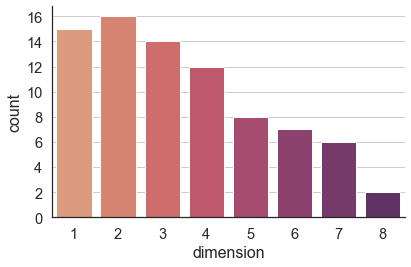

In [3]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))
palette = sns.color_palette('flare', n_colors=data.dimension.nunique())

## Get unique list of items.
items = data[['item','dimension']].drop_duplicates()

## Plot number of items.
sns.countplot(x=items.dimension, palette=palette, ax=ax)
ax.set(yticks=np.arange(0,17,2))
ax.grid(axis='y')

sns.despine()
plt.tight_layout()

Number of subjects by item

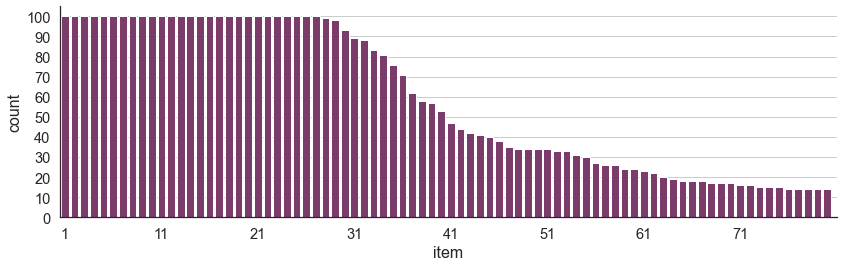

In [4]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot number of items.
sns.countplot(x=data.item, color='#863071', ax=ax)
ax.set(xticks=np.arange(0,81,10), yticks=np.arange(0,101,10))
ax.grid(axis='y')

sns.despine()
plt.tight_layout()

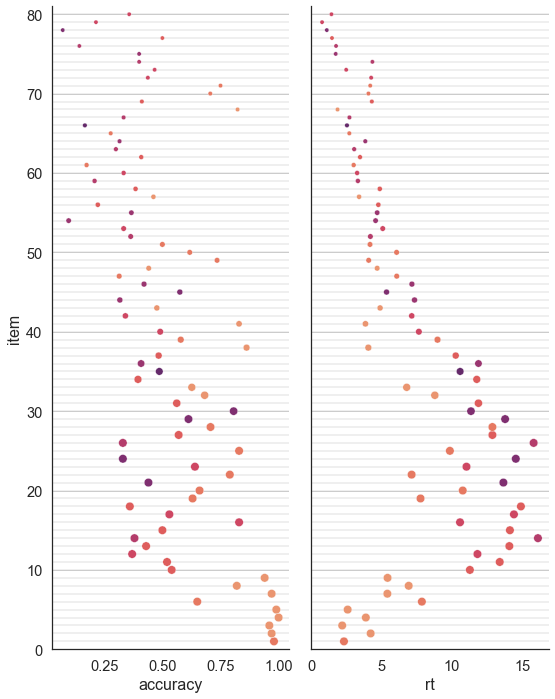

In [5]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(8,10),sharey=True)
palette = sns.color_palette('flare', n_colors=data.dimension.nunique())

## Compute averages. 
agg = {'accuracy':'mean','rt':'mean','subject':'count','dimension':'mean'}
gb = data.groupby('item').agg(agg).reset_index()

for ax, col in zip(axes, ['accuracy','rt']):
    
    ## Plot data
    sns.scatterplot(x=col, y='item', hue='dimension', size='subject', data=gb, 
                palette=palette, ax=ax)
    
    ## Add detail.
    x1, x2 = ax.get_xlim()
    ax.hlines(np.arange(data.item.nunique())+1, x1, x2, color='0.5', lw=0.25, zorder=-1)
    ax.set(xlim=(x1,x2), ylim=(0,81))
    ax.legend_.set_visible(False)
    ax.grid(axis='y')
    
sns.despine()
plt.tight_layout()

Table of items

In [6]:
gb.set_index('item').T

item,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
accuracy,0.98000,0.97000,0.96000,1.00000,0.99000,0.65000,0.97000,0.82000,0.94000,0.54000,...,0.750000,0.437500,0.466667,0.4000,0.400000,0.142857,0.500000,0.071429,0.214286,0.357143
rt,2.29611,4.20055,2.17074,3.85591,2.56124,7.85149,5.39006,6.91208,5.40551,11.27398,...,4.167562,4.235313,2.454667,4.3238,1.707867,1.731857,1.442214,1.073571,0.734643,1.404786
subject,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,...,16.000000,16.000000,15.000000,15.0000,15.000000,14.000000,14.000000,14.000000,14.000000,14.000000
dimension,2.00000,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,1.00000,3.00000,...,2.000000,4.000000,4.000000,5.0000,6.000000,5.000000,3.000000,7.000000,4.000000,4.000000


#### 1.2 Speed-accuracy tradeoffs

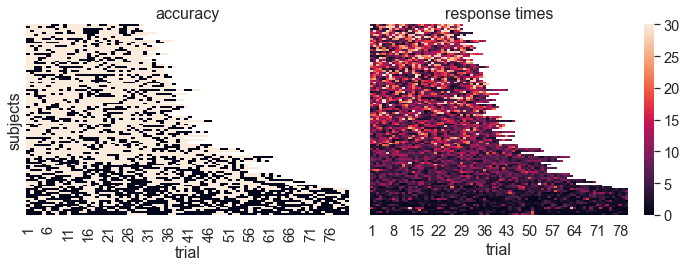

In [7]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(10,4))

## Pivot data (subject by trial).
pivot = data.pivot_table(['accuracy','rt'],'subject','trial')

## Sort data by RT.
pivot = pivot.loc[pivot['rt'].median(axis=1).sort_values(ascending=False).index]

## Plot accuracy.
sns.heatmap(pivot['accuracy'], vmin=0, vmax=1, yticklabels=[], cbar=False, ax=axes[0])
axes[0].set(ylabel='subjects', title='accuracy')

## Plot RTs.
sns.heatmap(pivot['rt'], vmin=0, vmax=30, yticklabels=[], ax=axes[1])
axes[1].set(ylabel='', title='response times')

plt.tight_layout()

Accuracy by RTs

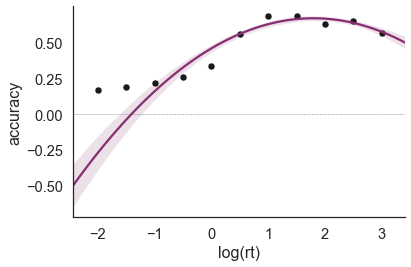

In [8]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Digitize RTs.
data['drt'] = np.digitize(data.logrt, np.arange(-1.75, 2.8, 0.5))
data['drt'] = data.drt.replace({i:j for i, j in enumerate(np.arange(-2,4,0.5))})

## Compute average accuracy by binned RT.
gb = data.groupby(['drt']).accuracy.mean().reset_index()

## Plot accuracy ~ logrt polynomial regression.
sns.regplot(x='logrt', y='accuracy', data=data, color='#863071', order=2, scatter=False, ax=ax)

## Plot observations.
sns.scatterplot(x='drt', y='accuracy', data=gb, s=50, color='k', ax=ax)

## Add detail.
ax.axhline(0, color='0.5', lw=0.5, linestyle='--', zorder=-1)
ax.set(xlabel='log(rt)')

sns.despine()
plt.tight_layout()

## Section 1: Parameter Comparison

In [ ]:
df1 = read_csv(os.path.join('stan_results','study02','2pl_summary.tsv'), sep='\t', index_col='name')
df2 = read_csv(os.path.join('stan_results','study02','3pl_fixed_summary.tsv'), sep='\t', index_col='name')
df3 = read_csv(os.path.join('stan_results','study02','3pl_summary.tsv'), sep='\t', index_col='name')

#### 1.1 Subject abilities

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Plot comparison 1.
sns.scatterplot(
    x=df1.T.filter(regex='theta').T['Mean'],
    y=df2.T.filter(regex='theta').T['Mean'],
    ax=axes[0]
)

## Plot comparison 2.
sns.scatterplot(
    x=df1.T.filter(regex='theta').T['Mean'],
    y=df3.T.filter(regex='theta').T['Mean'],
    ax=axes[1]
)

## Plot comparison 3.
sns.scatterplot(
    x=df2.T.filter(regex='theta').T['Mean'],
    y=df3.T.filter(regex='theta').T['Mean'],
    ax=axes[2]
)

## Add details.
for ax in axes: ax.plot([-5,5],[-5,5],color='0.5',linestyle='--',zorder=-1)
axes[0].set(xlim=(-2.3,2.1), ylim=(-2.3,2.1), xlabel='Ability (2pl)', ylabel='Ability (3pl-f)')
axes[1].set(xlim=(-2.3,2.1), ylim=(-2.3,2.1), xlabel='Ability (2pl)', ylabel='Ability (3pl)')
axes[2].set(xlim=(-2.3,2.1), ylim=(-2.3,2.1), xlabel='Ability (3pl-f)', ylabel='Ability (3pl)')

sns.despine()
plt.tight_layout()

#### 1.2 Item difficulties

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Plot comparison 1.
sns.scatterplot(
    x=df1.T.filter(regex='beta').T['Mean'],
    y=df2.T.filter(regex='beta').T['Mean'],
    ax=axes[0]
)

## Plot comparison 2.
sns.scatterplot(
    x=df1.T.filter(regex='beta').T['Mean'],
    y=df3.T.filter(regex='beta').T['Mean'],
    ax=axes[1]
)

## Plot comparison 3.
sns.scatterplot(
    x=df2.T.filter(regex='beta').T['Mean'],
    y=df3.T.filter(regex='beta').T['Mean'],
    ax=axes[2]
)

## Add details.
for ax in axes: ax.plot([-5,5],[-5,5],color='0.5',linestyle='--',zorder=-1)
axes[0].set(xlim=(-5,2.5), ylim=(-5,2.5), xlabel='Difficulty (2pl)', ylabel='Difficulty (3pl-f)')
axes[1].set(xlim=(-5,2.5), ylim=(-5,2.5), xlabel='Difficulty (2pl)', ylabel='Difficulty (3pl)')
axes[2].set(xlim=(-5,2.5), ylim=(-5,2.5), xlabel='Difficulty (3pl-f)', ylabel='Difficulty (3pl)')

sns.despine()
plt.tight_layout()

#### 1.3 Item discriminations

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Plot comparison 1.
sns.scatterplot(
    x=df1.T.filter(regex='alpha').T['Mean'],
    y=df2.T.filter(regex='alpha').T['Mean'],
    ax=axes[0]
)

## Plot comparison 2.
sns.scatterplot(
    x=df1.T.filter(regex='alpha').T['Mean'],
    y=df3.T.filter(regex='alpha').T['Mean'],
    ax=axes[1]
)

## Plot comparison 3.
sns.scatterplot(
    x=df2.T.filter(regex='alpha').T['Mean'],
    y=df3.T.filter(regex='alpha').T['Mean'],
    ax=axes[2]
)

## Add details.
for ax in axes: ax.plot([-5,5],[-5,5],color='0.5',linestyle='--',zorder=-1)
axes[0].set(xlim=(0.5,2), ylim=(0.5,2), xlabel='Discrimination (2pl)', ylabel='Discrimination (3pl-f)')
axes[1].set(xlim=(0.5,2), ylim=(0.5,2), xlabel='Discrimination (2pl)', ylabel='Discrimination (3pl)')
axes[2].set(xlim=(0.5,2), ylim=(0.5,2), xlabel='Discrimination (3pl-f)', ylabel='Discrimination (3pl)')

sns.despine()
plt.tight_layout()

#### 1.4 Parameter correlations

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Plot model 1.
L = df1.T.filter(regex='L').T['50%'].values.reshape(2,2)
sns.heatmap(L @ L.T, vmin=-1, vmax=1, center=0, cbar=False, annot=True, fmt='0.2f', ax=axes[0],
            xticklabels=['beta','alpha'], yticklabels=['beta','alpha'])
axes[0].set_title('2pl')

## Plot model 2.
L = df2.T.filter(regex='L').T['50%'].values.reshape(2,2)
sns.heatmap(L @ L.T, vmin=-1, vmax=1, center=0, cbar=False, annot=True, fmt='0.2f', ax=axes[1],
            xticklabels=['beta','alpha'], yticklabels=['beta','alpha'])
axes[1].set_title('3pl-f')

## Plot model 3.
L = df3.T.filter(regex='L').T['50%'].values.reshape(3,3)
sns.heatmap(L @ L.T, vmin=-1, vmax=1, center=0, cbar=False, annot=True, fmt='0.2f', ax=axes[2],
            xticklabels=['beta','alpha','gamma'], yticklabels=['beta','alpha','gamma'])
axes[2].set_title('3pl');

## Section 2: Posterior Predictive Check

In [ ]:
df1 = read_csv(os.path.join('stan_results','study02','2pl_ppc.tsv'), sep='\t')
df2 = read_csv(os.path.join('stan_results','study02','3pl_fixed_ppc.tsv'), sep='\t')
df3 = read_csv(os.path.join('stan_results','study02','3pl_ppc.tsv'), sep='\t')

#### 2.1 Subject accuracy 

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)
agg = {'accuracy':'mean', 'Y_hat':'mean'}
    
## Main loop.
for ax, df, title in zip(axes, [df1, df2, df3], ['2pl','3pl-f','3pl']):
    
    ## Compute mean within subjects.
    gb = df.groupby('subject').agg(agg)
    
    ## Plot posterior predictive check.
    sns.scatterplot(x='accuracy', y='Y_hat', data=gb, color='#4c72b0', ax=ax)
    ax.plot([0,1],[0,1],color='0.5',linestyle='--',zorder=-1)
    
    ## Add detail.
    ax.set(xlim=(0.2,1.05), xlabel='Observed', ylim=(0.2,1.05), title=title)
    if title == '2pl': ax.set_ylabel('Predicted')
    
sns.despine()
plt.tight_layout()

#### 2.2 Item accuracy 

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)
agg = {'accuracy':'mean', 'Y_hat':'mean'}
    
## Main loop.
for ax, df, title in zip(axes, [df1, df2, df3], ['2pl','3pl-f','3pl']):
    
    ## Compute mean within subjects.
    gb = df.groupby('item').agg(agg)
    
    ## Plot posterior predictive check.
    sns.scatterplot(x='accuracy', y='Y_hat', data=gb, color='#4c72b0', s=80, ax=ax)
    ax.plot([0,2],[0,2],color='0.5',linestyle='--',zorder=-1)
    
    ## Add detail.
    ax.set(xlim=(0.2,1.1), ylim=(0.2,1.1), xlabel='Observed', title=title)
    if title == '2pl': ax.set_ylabel('Predicted')
    
sns.despine()
plt.tight_layout()

#### 2.3 Model comparison

In [ ]:
## Main loop.
for df, title in zip([df1, df2, df3], ['2pl','3pl-f','3pl']):
    print('%s:\t%0.2f' %(title, df.WAIC.sum()))

In [ ]:
## Excluding items w/ suspicious large guessing parameters.
exclude = [1,2,3,4,5,7]

for df, title in zip([df1, df2, df3], ['2pl','3pl-f','3pl']):
    print('%s:\t%0.2f' %(title, df.loc[~df.item.isin(exclude)].WAIC.sum()))